# Imports

In [3]:
import os
import matplotlib.pyplot as plt
import pydub
from pydub.playback import play
import numpy as np

In [4]:
# Select files to use for testing and verify existence
TEST_FILE_1 = '../../Artists/Kanye/2049/02 POWER.mp3'
TEST_FILE_2 = '../../Artists/Kanye/2049/16 BOUND 2049.mp3'
print(os.path.exists(TEST_FILE_1))
print(os.path.exists(TEST_FILE_2))

True
True


# Load in mp3 files

In [5]:
test_track_1 = pydub.AudioSegment.from_mp3(TEST_FILE_1)
test_track_2 = pydub.AudioSegment.from_mp3(TEST_FILE_2)

# Get amplitude and loudness information

In [6]:
test_track_1_peak = test_track_1.max
test_track_1_loud = test_track_1.dBFS

test_track_2_peak = test_track_2.max
test_track_2_loud = test_track_2.dBFS

print(test_track_1_peak)
print(test_track_2_peak)
print(test_track_1_loud)
print(test_track_2_loud)

31504
30008
-19.279998739736854
-18.237451336165023


# Get raw data from files

In [7]:
# test_track_1_raw = test_track_1.raw_data
# print(test_track_1_raw)

# Create a loop to get the sound data of a track

## Get an amplitude at a certain time
Say we wanted to find the amplitude of a song at 5 seconds

In [10]:
test_track_1[5*1000].max

9639

## Loop over the whole track to get information

In [40]:
# Get length of song
test_track_1_length = len(test_track_1)

# Create of a list of seconds to capture
## interval desired
five_seconds = 5*1000
## create array of times to grab
times_to_grab = np.arange(0, test_track_1_length, five_seconds)
print(times_to_grab)

[     0   5000  10000  15000  20000  25000  30000  35000  40000  45000
  50000  55000  60000  65000  70000  75000  80000  85000  90000  95000
 100000 105000 110000 115000 120000 125000 130000 135000 140000 145000
 150000 155000 160000 165000 170000]


In [41]:
test_track_1_amps = []
for x in times_to_grab:
    amplitude = test_track_1[x].max
    test_track_1_amps.append(amplitude)

In [42]:
# Show the first few to verify it works
test_track_1_amps[:10]

[2, 9639, 3291, 4248, 6061, 3573, 5660, 7267, 5410, 1832]

## Build the function for implementation

In [56]:
def get_amplitudes(track, interval=5):
    '''
    Inputs:
        - track: a pydub audio segmentation file
        - interval: sampling rate of the track
    
    Ouputs
        - times_wanted
        - amplitudes
    '''
    amplitudes = []
    track_length = len(track)
    times_wanted = np.arange(0, track_length, interval*1000)

    for x in times_wanted:
        amplitude = track[x].max
        amplitudes.append(amplitude)

    return(times_wanted, amplitudes)

## Test Function

In [57]:
get_amplitudes(test_track_1, 5)

(array([     0,   5000,  10000,  15000,  20000,  25000,  30000,  35000,
         40000,  45000,  50000,  55000,  60000,  65000,  70000,  75000,
         80000,  85000,  90000,  95000, 100000, 105000, 110000, 115000,
        120000, 125000, 130000, 135000, 140000, 145000, 150000, 155000,
        160000, 165000, 170000]),
 [2,
  9639,
  3291,
  4248,
  6061,
  3573,
  5660,
  7267,
  5410,
  1832,
  5621,
  3488,
  3433,
  8254,
  5785,
  5856,
  14728,
  11556,
  3120,
  8978,
  13739,
  6511,
  5166,
  6230,
  13866,
  15473,
  9890,
  6552,
  8690,
  6238,
  6366,
  718,
  6644,
  1462,
  6258])

# Graph amplitudes over time

In [58]:
times_1, amps_1 = get_amplitudes(test_track_1, 5)

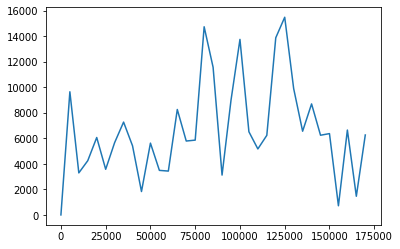

In [59]:
plt.plot(times_1, amps_1)

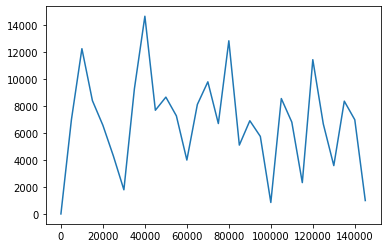

In [61]:
test_2 = get_amplitudes(test_track_2, 5)
plt.plot(test_2[0], test_2[1])

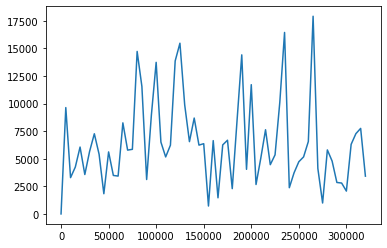

In [63]:
new_track = test_track_1 + test_track_2
new_track_amps = get_amplitudes(new_track, 5)
plt.plot(new_track_amps[0], new_track_amps[1])